In [1]:
# Import libraries
import sys
import os
import json 
import pandas as pd
import matplotlib.pylab as plt

In [2]:
from compositionspace.datautils import DataPreparation

from compositionspace.segmentation import CompositionClustering
from compositionspace.postprocessing import DataPostprocess

In [3]:
data = DataPreparation("experiment_params.yaml")
data.get_big_slices()
data.get_voxels()
data.calculate_voxel_composition()

Reading files:   0%|          | 0/5 [00:00<?, ?it/s]

Creating chunks:   0%|          | 0/10 [00:00<?, ?it/s]

Getting Voxels:   0%|          | 0/10 [00:00<?, ?it/s]

Calculating voxel composition:   0%|          | 0/8846 [00:00<?, ?it/s]

In [4]:
data.chunk_files

['output/file_R31_06365-v02_pos_large_chunks_arr.h5']

In [5]:
data.voxel_files

['output/file_R31_06365-v02_pos_small_chunks_arr.h5']

In [6]:
data.voxel_ratio_file

'output/output_vox_ratio_composition.h5'

8846
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', 'Total_no', 'vox']


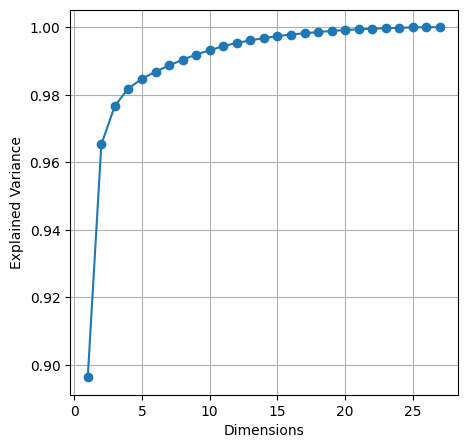

In [7]:
comps = CompositionClustering("experiment_params.yaml")
res = comps.get_PCA_cumsum(data.voxel_ratio_file, data.voxel_files[0])

Clustering:   0%|          | 0/9 [00:00<?, ?it/s]

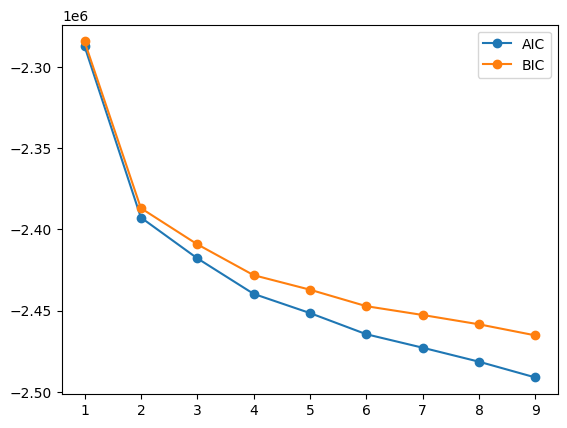

In [8]:
res = comps.get_bics_minimization(data.voxel_ratio_file, data.voxel_files[0])

In [9]:
comps.get_composition_clusters(data.voxel_ratio_file, data.voxel_files[0])

ratios         0    1    2    3    4    5         6    7         8    9  ...   19  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.083333  0.0  0.916667  0.0  ...  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.148148  0.0  0.851852  0.0  ...  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.177419  0.0  0.822581  0.0  ...  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.112903  0.0  0.870968  0.0  ...  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.134328  0.0  0.865672  0.0  ...  0.0   
...   ...  ...  ...  ...  ...  ...       ...  ...       ...  ...  ...  ...   
8841  0.0  0.0  0.0  0.0  0.0  0.0  0.038462  0.0  0.961538  0.0  ...  0.0   
8842  0.0  0.0  0.0  0.0  0.0  0.0  0.218750  0.0  0.750000  0.0  ...  0.0   
8843  0.0  0.0  0.0  0.0  0.0  0.0  0.230769  0.0  0.769231  0.0  ...  0.0   
8844  0.0  0.0  0.0  0.0  0.0  0.0  0.228571  0.0  0.771429  0.0  ...  0.0   
8845  0.0  0.0  0.0  0.0  0.0  0.0  0.181818  0.0  0.818182  0.0  ...  0.0   

            20   21   22   23   24   25   26  Total_no  

In [10]:
comps.generate_plots()

In [12]:
pdata = DataPostprocess("experiment_params.yaml")
print(f"comps.voxel_centroid_output_file {comps.voxel_centroid_output_file}")

comps.voxel_centroid_output_file output/vox_centroid_file.h5


In [ ]:
## Inspect that vox_centroid_file contains indeed just copies

In [37]:
import h5py
import numpy as np
h5r = h5py.File(comps.voxel_centroid_output_file, "r")
xyz_0 = h5r["0/0"][:, :]
xyz_1 = h5r["1/1"][:, :]
xyz_2 = h5r["2/2"][:, :]
h5r.close()
visited = np.zeros((len(xyz_2),), bool)
print(f"xyz_0 {np.shape(xyz_0)}")
print(f"xyz_1 {np.shape(xyz_1)}")
print(f"xyz_2 {np.shape(xyz_2)}")
print(f"visited {np.shape(visited)}")
print(visited)
max_diff = 0.
if False is True:
    for i in np.arange(0, np.shape(xyz_0)[0]):
        idx = int(xyz_0[i, 3])
        if visited[idx] is not True:
            visited[idx] = True
            sqr_diff = (xyz_2[idx, 0] - xyz_0[i, 0])**2 + (xyz_2[idx, 1] - xyz_0[i, 1])**2 + (xyz_2[idx, 2] - xyz_0[i, 2])**2
            if sqr_diff >= max_diff:
                max_diff = sqr_diff
            # print(f"idx {idx} sqr_diff {format(sqr_diff, '.60g')}")
        else:
            print(f"idx {idx} visited already")
    print(max_diff)
    print(np.sum(visited))
for i in np.arange(0, np.shape(xyz_1)[0]):
    idx = int(xyz_1[i, 3])
    if visited[idx] is not True:
        visited[idx] = True
        sqr_diff = (xyz_2[idx, 0] - xyz_1[i, 0])**2 + (xyz_2[idx, 1] - xyz_1[i, 1])**2 + (xyz_2[idx, 2] - xyz_1[i, 2])**2
        if sqr_diff >= max_diff:
            max_diff = sqr_diff
        # print(f"idx {idx} sqr_diff {format(sqr_diff, '.60g')}")
    else:
        print(f"idx {idx} visited already")
print(max_diff)
print(np.sum(visited))

xyz_0 (1145, 4)
xyz_1 (7701, 4)
xyz_2 (8846, 4)
visited (8846,)
[False False False ... False False False]
0.0
7701


## Conclusion: Indeed the vox_centroid_file contains unnecessary copies of positions that could be replaced with a phase_identifier array with low entropy, i.e. high compressibility

In [43]:
from sklearn.cluster import DBSCAN

eps = 3  # self.params["ml_models"]["DBScan"]["eps"]
min_samples = 5  # self.params["ml_models"]["DBScan"]["min_samples"]

Df_centroids_no_files, Df_centroids, Phase_columns = pdata.get_post_centroids(comps.voxel_centroid_output_file, 1)
print(f"df_centroids_no_files {Df_centroids_no_files}")
print(f"Df_centroids {Df_centroids}")
print(f"Phase_columns {Phase_columns}")

db = DBSCAN(eps=eps, min_samples=min_samples).fit(Df_centroids_no_files.values)  # eps=5., min_samples= 35
print(np.unique(db.core_sample_indices_))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

df_centroids_no_files               x          y          z
0      1.165864 -12.451165   1.844004
1     -6.604443 -10.637289   1.862066
2     -4.879410 -10.819287   1.789007
3     -2.988727 -10.974772   1.746318
4     -1.026185 -10.931932   1.666531
...         ...        ...        ...
7696 -11.638060  24.734481  30.372568
7697 -10.306039  25.277091  30.354891
7698  -5.920133  26.609279  30.263090
7699  -4.098696  26.887242  30.252511
7700  -2.042664  27.310195  30.393773

[7701 rows x 3 columns]
Df_centroids               x          y          z  file_name
0      1.165864 -12.451165   1.844004        0.0
1     -6.604443 -10.637289   1.862066        1.0
2     -4.879410 -10.819287   1.789007        2.0
3     -2.988727 -10.974772   1.746318        3.0
4     -1.026185 -10.931932   1.666531        4.0
...         ...        ...        ...        ...
7696 -11.638060  24.734481  30.372568     8841.0
7697 -10.306039  25.277091  30.354891     8842.0
7698  -5.920133  26.609279  30.263090     8

  0%|          | 0/31 [00:00<?, ?it/s]

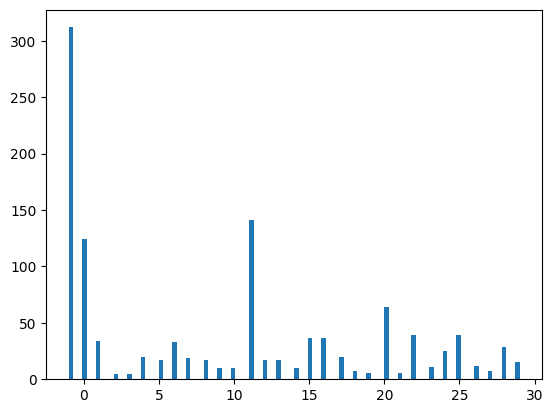

In [12]:
pdata.DBSCAN_clustering(comps.voxel_centroid_output_file, cluster_id = 0,
                        plot=True, plot3d=True, save=True)